In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import re

In [22]:
df_Coursera_courses=pd.read_csv('./Moocs/Coursera_courses.csv')
df_Coursera_reviews=pd.read_csv('./Moocs/Coursera_reviews.csv')
df_edx_courses=pd.read_csv('./Moocs/edx_courses.csv')
df_udemy_courses=pd.read_csv('./Moocs/udemy_courses.csv')

#### Coursera Reviews

In [3]:
df_Coursera_reviews=pd.read_csv('./Moocs/Coursera_reviews.csv')

In [4]:
df_Coursera_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1454711 entries, 0 to 1454710
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   reviews       1454571 non-null  object
 1   reviewers     1454711 non-null  object
 2   date_reviews  1454711 non-null  object
 3   rating        1454711 non-null  int64 
 4   course_id     1454711 non-null  object
dtypes: int64(1), object(4)
memory usage: 55.5+ MB


#### Coursera Courses

In [17]:
df_Coursera_courses=pd.read_csv('./Moocs/Coursera_courses.csv')

In [250]:
df_Coursera_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         623 non-null    object
 1   institution  623 non-null    object
 2   course_url   623 non-null    object
 3   course_id    623 non-null    object
dtypes: object(4)
memory usage: 19.6+ KB


Uniendo los 2 dataframes de coursera, usando la columna ***'course_id'*** como elemento vinculante

In [40]:
merged_df = df_Coursera_reviews.merge(df_Coursera_courses, left_on='course_id', right_on='course_id', how='left')

In [42]:
merged_df['date_reviews']=pd.to_datetime(merged_df['date_reviews'])

In [43]:
merged_df.reset_index(drop=True)

,reviews,reviewers,date_reviews,rating,course_id,name,institution,course_url
0,"Pretty dry, but I was able to pass with just t...",By Robert S,2020-02-12,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...
1,would be a better experience if the video and ...,By Gabriel E R,2020-09-28,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...
2,Information was perfect! The program itself wa...,By Jacob D,2020-04-08,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...
3,A few grammatical mistakes on test made me do ...,By Dale B,2020-02-24,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...
4,Excellent course and the training provided was...,By Sean G,2020-06-18,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...
...,...,...,...,...,...,...,...,...
1454706,g,By Brijesh K,2020-08-25,5,computer-networking,The Bits and Bytes of Computer Networking,Google,https://www.coursera.org/learn/computer-networ...
1454707,.,By Vasavi V M,2020-07-02,5,computer-networking,The Bits and Bytes of Computer Networking,Google,https://www.coursera.org/learn/computer-networ...
1454708,.,By Drishti D,2020-06-20,5,computer-networking,The Bits and Bytes of Computer Networking,Google,https://www.coursera.org/learn/computer-networ...
1454709,.,By FAUSTINE F K,2020-06-07,5,computer-networking,The Bits and Bytes of Computer Networking,Google,https://www.coursera.org/learn/computer-networ...


Dataset adicional para complementar informacion acerca de suscriptores

In [24]:
df_Coursera_data=pd.read_csv('./Moocs/Coursera_data.csv')

In [18]:
df_Coursera_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                891 non-null    int64  
 1   course_title              891 non-null    object 
 2   course_organization       891 non-null    object 
 3   course_Certificate_type   891 non-null    object 
 4   course_rating             891 non-null    float64
 5   course_difficulty         891 non-null    object 
 6   course_students_enrolled  891 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 48.9+ KB


In [44]:
merged_df = merged_df.merge(df_Coursera_data, left_on='name', right_on='course_title', how='left')

In [45]:
# Eliminando nulos
merged_df.dropna(inplace=True)

In [36]:
# Eliminando columnas innecesarias
merged_df.drop(columns='course_rating',inplace=True)

In [46]:
merged_df.drop(columns=['Unnamed: 0','course_organization','course_title','course_url','course_rating'],inplace=True)

In [38]:
merged_df = merged_df.sample(800)

In [41]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1454711 entries, 0 to 1454710
Data columns (total 8 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   reviews       1454571 non-null  object
 1   reviewers     1454711 non-null  object
 2   date_reviews  1454711 non-null  object
 3   rating        1454711 non-null  int64 
 4   course_id     1454711 non-null  object
 5   name          1454711 non-null  object
 6   institution   1454711 non-null  object
 7   course_url    1454711 non-null  object
dtypes: int64(1), object(7)
memory usage: 99.9+ MB


Utilizaremos el archivo unificado para el dashboard

In [39]:
merged_df.to_csv('./Moocs/@coursera.csv',index=False)

#### Edx Courses

In [47]:
df_edx_courses=pd.read_csv('./Moocs/edx_courses.csv')
df_edx_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               975 non-null    object
 1   summary             922 non-null    object
 2   n_enrolled          855 non-null    object
 3   course_type         975 non-null    object
 4   institution         975 non-null    object
 5   instructors         972 non-null    object
 6   Level               975 non-null    object
 7   subject             975 non-null    object
 8   language            975 non-null    object
 9   subtitles           972 non-null    object
 10  course_effort       975 non-null    object
 11  course_length       975 non-null    object
 12  price               975 non-null    object
 13  course_description  935 non-null    object
 14  course_syllabus     417 non-null    object
 15  course_url          975 non-null    object
dtypes: object(16)
memory usage

Generando el archivo de texto para el WORDCLOUD

In [71]:
texto='\n'.join(df_edx_courses['title'].astype(str))
texto = texto[0:1500]
print(texto)
with open("./Moocs/output.txt", "w") as text_file:
    text_file.write(texto)

How to Learn Online
Programming for Everybody (Getting Started with Python)
CS50's Introduction to Computer Science
The Analytics Edge
Marketing Analytics: Marketing Measurement Strategy
Introduction to Project Management
Leading High-Performing Teams
The Foundations of Happiness at Work
Managing Study, Stress and Mental Health at University
Six Sigma: Define and Measure
Fat Chance: Probability from the Ground Up
Chasing your Dream: How to End Procrastination and Get a Job You Love
Bitcoin and Cryptocurrencies
English Grammar and Style
Ethics in Action
Introduction to FinTech
Data Science: R Basics
Python Basics for Data Science
The Science of Beer
Strategic Social Media Marketing
CS50's Introduction to Artificial Intelligence with Python
CS50's Introduction to Game Development
Rhetoric: The Art of Persuasive Writing and Public Speaking
CS50's Web Programming with Python and JavaScript
Contract Law: From Trust to Promise to Contract
Fundamentals of Neuroscience, Part 1: The Electrical 

In [159]:
df_edx_courses.head(5)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...


<AxesSubplot: >

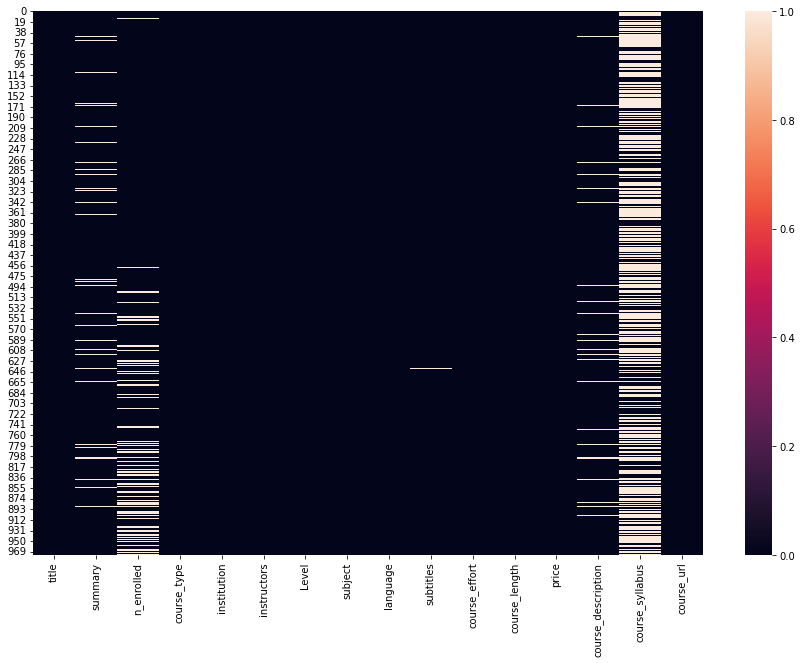

In [118]:
# Un vistaso rapido a los nulos del dataset
plt.figure(figsize=(15,10))
sns.heatmap(df_edx_courses.isnull())


In [160]:
print('Porcentajes de nulos:')
print('course_syllabus: ',len(df_edx_courses[df_edx_courses['course_syllabus'].isnull()]['course_syllabus'])/len(df_edx_courses['course_syllabus']))
print('n_enrolled: ',len(df_edx_courses[df_edx_courses['n_enrolled'].isnull()]['n_enrolled'])/len(df_edx_courses['n_enrolled'])) 
print('summary: ',len(df_edx_courses[df_edx_courses['summary'].isnull()]['summary'])/len(df_edx_courses['summary'])) 
print('course_description: ',len(df_edx_courses[df_edx_courses['course_description'].isnull()]['course_description'])/len(df_edx_courses['course_description'])) 

Porcentajes de nulos:
course_syllabus:  0.5723076923076923
n_enrolled:  0.12307692307692308
summary:  0.05435897435897436
course_description:  0.041025641025641026


Se puede observar en la info general del dataframe que la columna price es del tipo string pero contiene el importe del precio, asi que este debe ser extraido y convertido a tipo int

In [236]:
df_edx_courses['price'] = df_edx_courses['price'].str.extract(r'(\d+)', expand=False).astype(int)

La columna ***n_enrolled*** debe ser cambiada a tipo int, pero primero se debe eliminar la presencia de nulos en la columna.

In [237]:
df_edx_courses[df_edx_courses['n_enrolled'].isnull()] # resultado 120 nulos
# No existen titulos repetidos entre los nulos. Es muy probable que sea simplemente informacion no disponible. Estas fila seran eliminadas
df_edx_courses.dropna(subset=['n_enrolled'],inplace=True)

In [238]:
#df_edx_courses['n_enrolled']=df_edx_courses['n_enrolled'].str.replace(",","") 
#df_edx_courses['n_enrolled']=df_edx_courses['n_enrolled'].astype(int) --> no se puede ejecutar por la presencia de nulos
df_edx_courses['n_enrolled']=pd.to_numeric(df_edx_courses['n_enrolled'].str.replace(",",""), errors='coerce')

Inspeccionando columna ***sumary***

In [210]:
df_edx_courses[df_edx_courses['summary'].isnull()]

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
45,CS50 for Lawyers,NaN,87336,Self-paced on your time,Harvard University,Doug Lloyd-David J. Malan,Introductory,Computer Science,English,English,3–6 hours per week,10 Weeks,99,NaN,NaN,https://www.edx.org/course/cs50-for-lawyers
52,Introduction to Data Wise: A Collaborative Pro...,NaN,117410,Self-paced on your time,Harvard University,Kathryn Parker Boudett,Intermediate,Education & Teacher Training,English,"English, Español",1–2 hours per week,10 Weeks,70,Educators have an ever-increasing stream of da...,NaN,https://www.edx.org/course/introduction-to-dat...
109,Introduction to Investments,NaN,91788,Self-paced on your time,Indian Institute of Management Bangalore,S.G. Badrinath,Intermediate,Business & Management,English,English,3–5 hours per week,5 Weeks,50,"When you complete this course, you will become...",NaN,https://www.edx.org/course/introduction-to-inv...
165,First Nights - Beethoven's 9th Symphony and th...,NaN,37426,Self-paced on your time,Harvard University,Thomas Forrest Kelly,Introductory,Humanities,English,English,3–5 hours per week,3 Weeks,49,Ludwig van Beethoven’s 9th Symphony premiered ...,NaN,https://www.edx.org/course/first-nights-beetho...
166,Cell Biology: Mitochondria,NaN,64142,Self-paced on your time,Harvard University,Robert A. Lue,Introductory,Biology & Life Sciences,English,English,2–4 hours per week,4 Weeks,99,The cell is a powerful case study to help us e...,NaN,https://www.edx.org/course/cell-biology-mitoch...
169,Creative Thinking: Techniques and Tools for Su...,NaN,54787,Self-paced on your time,Imperial College London,Peter Childs,Introductory,Humanities,English,English,2–4 hours per week,7 Weeks,49,NaN,NaN,https://www.edx.org/course/creative-thinking-t...
206,Introducción a la Regulación Emocional basada ...,NaN,20634,Self-paced on your time,Universidad Autónoma de Madrid,Beatriz Rodríguez Vega-Carmen Bayón Pérez-Ánge...,Introductory,Health & Safety,Español,Español,5–6 hours per week,4 Weeks,49,NaN,NaN,https://www.edx.org/course/introduccion-a-la-r...
232,"Hollywood: History, Industry, Art",NaN,50033,Self-paced on your time,University of Pennsylvania,Peter Decherney,Introductory,Communication,English,English,3–4 hours per week,4 Weeks,169,In this course you will learn about Hollywood ...,NaN,https://www.edx.org/course/hollywood-history-i...
235,Philosophy and Critical Thinking,NaN,97175,Self-paced on your time,The University of Queensland,Professor Deborah Brown-Dr Peter Ellerton,Introductory,Humanities,English,English,1–4 hours per week,6 Weeks,99,What can we learn through philosophical inquir...,NaN,https://www.edx.org/course/philosophy-and-crit...
271,Introducción al desarrollo de aplicaciones web,NaN,27757,Self-paced on your time,Universidad Autónoma de Madrid,Ruth Cobos Pérez-Álvaro Ortigosa-Roberto Lator...,Introductory,Computer Science,Español,Español,4–5 hours per week,5 Weeks,49,NaN,NaN,https://www.edx.org/course/introduccion-al-des...


Debido a que estos cursos sin sumario poseen suscriptores, no podemos perder esa informacion asi que imputaremos 'no available'

In [239]:
df_edx_courses['summary'].fillna('not available',inplace=True)

Inspeccionando columna ***instructors***

In [166]:
df_edx_courses[df_edx_courses['instructors'].isnull()]

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
390,Analytics in Python,Learn the fundamental of programming in Python...,82210,Instructor-led on a course schedule,Columbia University,NaN,Intermediate,Business & Management,English,NaN,8–10 hours per week,12 Weeks,249,Data is the lifeblood of an organization. Comp...,NaN,https://www.edx.org/course/analytics-in-python
401,Just Reading and Writing in English | 生活英语读写,Learn how to read and write in English in the ...,33303,Self-paced on your time,Tsinghua University,NaN,Introductory,Art & Culture,English,English,2–4 hours per week,15 Weeks,149,Reading enriches our life and writing enables ...,Week 1 - Learning\nIntroduction to the problem...,https://www.edx.org/course/just-reading-and-wr...
516,"Data, Models and Decisions in Business Analytics",Learn fundamental tools and techniques for usi...,36289,Instructor-led on a course schedule,Columbia University,NaN,Advanced,Business & Management,English,NaN,8–10 hours per week,12 Weeks,249,"In today’s world, managerial decisions are inc...",NaN,https://www.edx.org/course/data-models-and-dec...


al igual que con la columna ***summary*** se le imputará la cadena 'no available' a los nulos

In [240]:
df_edx_courses['instructors'].fillna('not available',inplace=True)

de la misma forma quen las columnas anteriores procederemos con ***subtitles***

In [168]:
df_edx_courses[df_edx_courses['subtitles'].isnull()]

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
390,Analytics in Python,Learn the fundamental of programming in Python...,82210,Instructor-led on a course schedule,Columbia University,not available,Intermediate,Business & Management,English,NaN,8–10 hours per week,12 Weeks,249,Data is the lifeblood of an organization. Comp...,NaN,https://www.edx.org/course/analytics-in-python
516,"Data, Models and Decisions in Business Analytics",Learn fundamental tools and techniques for usi...,36289,Instructor-led on a course schedule,Columbia University,not available,Advanced,Business & Management,English,NaN,8–10 hours per week,12 Weeks,249,"In today’s world, managerial decisions are inc...",NaN,https://www.edx.org/course/data-models-and-dec...
640,Ecodesign for Cities and Suburbs,not available,28472,Self-paced on your time,University of British Columbia,Jonathan Barnett-Larry Beasley,Introductory,Environmental Studies,English,NaN,4–5 hours per week,6 Weeks,99,Too often modern cities and suburbs are disorg...,Week 1: How the usual urban growth model opera...,https://www.edx.org/course/ecodesign-for-citie...


In [241]:
df_edx_courses['subtitles'].fillna('not available',inplace=True)

***course_description*** tambien se precesara de la misma forma...

In [170]:
df_edx_courses[df_edx_courses['course_description'].isnull()]

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
12,Bitcoin and Cryptocurrencies,This course is part of a Professional Certificate,83398,Self-paced on your time,"University of California, Berkeley",Rustie Lin-Mengyi (Gloria) Wang,Introductory,Computer Science,English,English,3–5 hours per week,6 Weeks,99,NaN,NaN,https://www.edx.org/course/bitcoin-and-cryptoc...
21,CS50's Introduction to Game Development,This course is part of a Professional Certificate,346748,Self-paced on your time,Harvard University,David J. Malan-Colton Ogden,Intermediate,Computer Science,English,English,6–9 hours per week,12 Weeks,149,NaN,NaN,https://www.edx.org/course/cs50s-introduction-...
45,CS50 for Lawyers,not available,87336,Self-paced on your time,Harvard University,Doug Lloyd-David J. Malan,Introductory,Computer Science,English,English,3–6 hours per week,10 Weeks,99,NaN,NaN,https://www.edx.org/course/cs50-for-lawyers
169,Creative Thinking: Techniques and Tools for Su...,not available,54787,Self-paced on your time,Imperial College London,Peter Childs,Introductory,Humanities,English,English,2–4 hours per week,7 Weeks,49,NaN,NaN,https://www.edx.org/course/creative-thinking-t...
173,CS50's Understanding Technology,This course is part of a XSeries Program,50030,Self-paced on your time,Harvard University,David J. Malan,Introductory,Computer Science,English,English,2–6 hours per week,6 Weeks,90,NaN,NaN,https://www.edx.org/course/cs50s-understanding...
206,Introducción a la Regulación Emocional basada ...,not available,20634,Self-paced on your time,Universidad Autónoma de Madrid,Beatriz Rodríguez Vega-Carmen Bayón Pérez-Ánge...,Introductory,Health & Safety,Español,Español,5–6 hours per week,4 Weeks,49,NaN,NaN,https://www.edx.org/course/introduccion-a-la-r...
271,Introducción al desarrollo de aplicaciones web,not available,27757,Self-paced on your time,Universidad Autónoma de Madrid,Ruth Cobos Pérez-Álvaro Ortigosa-Roberto Lator...,Introductory,Computer Science,Español,Español,4–5 hours per week,5 Weeks,49,NaN,NaN,https://www.edx.org/course/introduccion-al-des...
292,A-level Mathematics for Year 12 - Course 1: Al...,not available,22366,Self-paced on your time,Imperial College London,Philip Ramsden-Phil Chaffe,Intermediate,Math,English,English,2–4 hours per week,7 Weeks,49,NaN,NaN,https://www.edx.org/course/a-level-mathematics...
293,Blockchain Technology,This course is part of a Professional Certificate,55376,Self-paced on your time,"University of California, Berkeley",Rustie Lin-Nadir Akhtar,Intermediate,Computer Science,English,English,3–5 hours per week,6 Weeks,99,NaN,NaN,https://www.edx.org/course/blockchain-technology
318,Academic writing for clarity and meaning,not available,16220,Self-paced on your time,Wits University,Peter Alkema-Nomusa Mazonde-Terri Carmichael,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,49,NaN,NaN,https://www.edx.org/course/academic-writing-fo...


In [242]:
df_edx_courses['course_description'].fillna('not available',inplace=True)

In [244]:
df_edx_courses.reset_index(drop=True)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,124980,Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,49,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...",293864,Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,49,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,2442271,Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,90,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...",129555,Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,199,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,81140,Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,249,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,StudioX: Creating a Course with edX Studio,Learn the fundamentals of creating courses on ...,20355,Self-paced on your time,edX,Nina Huntemann-Ben Piscopo,Introductory,Education & Teacher Training,English,English,4–6 hours per week,3 Weeks,99,"In this course, we will introduce you to edX S...",NaN,https://www.edx.org/course/studiox-creating-a-...
851,Introducción a las ondas gravitacionales,"En este curso, junto con la Dra. Gabriela Gonz...",8657,Self-paced on your time,Universidad Nacional de Córdoba,Gabriela González,Introductory,Science,Español,"English, Español",5–7 hours per week,4 Weeks,50,En este curso conocerás sobre las ondas gravit...,Introducción: En este curso vamos a hablar de ...,https://www.edx.org/course/introduccion-a-las-...
852,Global China: From the Mongols to the Ming,Explore the impact of the conquest dynasties a...,41902,Self-paced on your time,Harvard University,Peter K. Bol-William C. Kirby,Introductory,History,English,"English, 中文",1–3 hours per week,15 Weeks,139,"In the 13th century, by force of arms, the Mon...",NaN,https://www.edx.org/course/global-china-from-t...
853,Computational Neuroscience: Neuronal Dynamics ...,This course explains the mathematical and comp...,11246,Self-paced on your time,École polytechnique fédérale de Lausanne,Wulfram Gerstner,Advanced,Biology & Life Sciences,English,English,4–6 hours per week,6 Weeks,139,What happens in your brain when you make a dec...,Textbook: Neuronal Dynamics - from single neur...,https://www.edx.org/course/computational-neuro...


la columna ***course_syllabus*** posee demasiados nulos asi que no esta proporcionando informacion significativa. En consecuencia se eliminará

In [215]:
#df_edx_courses = df_edx_courses.drop(columns='course_syllabus')
df_edx_courses=df_edx_courses.iloc[:,0:13]


In [204]:
df_edx_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          13 non-null     object
 1   summary        13 non-null     object
 2   n_enrolled     13 non-null     object
 3   course_type    13 non-null     object
 4   institution    13 non-null     object
 5   instructors    13 non-null     object
 6   Level          13 non-null     object
 7   subject        13 non-null     object
 8   language       13 non-null     object
 9   subtitles      13 non-null     object
 10  course_effort  13 non-null     object
 11  course_length  13 non-null     object
 12  price          13 non-null     object
dtypes: object(13)
memory usage: 1.4+ KB


el dataframe esta listo para ser exportado a .csv

In [ ]:
df_edx_courses.head(20)

In [246]:
df_edx_courses.to_csv('./Moocs/edx.csv',index=False)

### Udemy Courses

In [3]:
df_udemy_courses=pd.read_csv('./Moocs/udemy_courses.csv')

In [4]:
df_udemy_courses.head(5)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [5]:
df_udemy_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


La columna published_timestamp es un string por lo que debemos cambiarlo a datetime parta poder explotarlo. Debido a que el DASHBOARD se implementará en Power BI no haremos mas trabajos sobre esta columna.

In [6]:
df_udemy_courses['published_timestamp']=pd.to_datetime(df_udemy_courses['published_timestamp'])

Verificando la existencia de fila duplicadas en el dataset

In [7]:
df_udemy_courses[df_udemy_courses.duplicated()]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
787,837322,Essentials of money value: Get a financial Life !,https://www.udemy.com/essentials-of-money-value/,True,20,0,0,20,All Levels,0.616667,2016-05-16 18:28:30+00:00,Business Finance
788,1157298,Introduction to Forex Trading Business For Beg...,https://www.udemy.com/introduction-to-forex-tr...,True,20,0,0,27,Beginner Level,1.500000,2017-04-23 16:19:01+00:00,Business Finance
894,1035638,Understanding Financial Statements,https://www.udemy.com/understanding-financial-...,True,25,0,0,10,All Levels,1.000000,2016-12-15 14:56:17+00:00,Business Finance
1100,1084454,CFA Level 2- Quantitative Methods,https://www.udemy.com/cfa-level-2-quantitative...,True,40,0,0,35,All Levels,5.500000,2017-07-02 14:29:35+00:00,Business Finance
1473,185526,MicroStation - Células,https://www.udemy.com/microstation-celulas/,True,20,0,0,9,Beginner Level,0.616667,2014-04-15 21:48:55+00:00,Graphic Design
2561,28295,Learn Web Designing & HTML5/CSS3 Essentials in...,https://www.udemy.com/build-beautiful-html5-we...,True,75,43285,525,24,All Levels,4.000000,2013-01-03 00:55:31+00:00,Web Development


In [8]:
# Eliminaremos las filas duplicadas
df_udemy_courses.drop_duplicates(inplace=True)

Explorando consistencia en num_suscribers ya que esta columna se usara para inferir el nivel de ventas

In [9]:
# Aqui podemos apreciar que el valor minimo es 0
df_udemy_courses.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.672000e+03,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000
mean,6.758977e+05,66.102941,3190.586874,156.371460,40.140251,4.097603
std,3.430720e+05,61.035920,9488.105448,936.178649,50.417102,6.057830
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.077615e+05,20.000000,111.750000,4.000000,15.000000,1.000000
50%,6.876920e+05,45.000000,912.000000,18.000000,25.000000,2.000000
75%,9.608140e+05,95.000000,2548.750000,67.000000,46.000000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


Exploramos la columna lectures porque en el describe se aprecia que el valor minimo es 0. Es decir son cursos sin clases. Se encontro que solo es un a unica ocurrencia y se procedera a eliminarla

In [10]:
df_udemy_courses.query('num_lectures==0')

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
892,627332,Mutual Funds for Investors in Retirement Accounts,https://www.udemy.com/mutual-funds-for-investo...,True,20,0,0,0,All Levels,0.0,2015-12-17 05:38:38+00:00,Business Finance


In [11]:
df_udemy_courses = df_udemy_courses.drop(892,axis=0).reset_index(drop=True)

Explorando la columna num_suscribers notamos que en las filas donde es 0 lo es tambien en la columna num_reviews, por lo que se puede considerar a estos valores como consistentes

In [12]:
df_udemy_courses[df_udemy_courses['num_subscribers']==0]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
453,837322,Essentials of money value: Get a financial Life !,https://www.udemy.com/essentials-of-money-value/,True,20,0,0,20,All Levels,0.616667,2016-05-16 18:28:30+00:00,Business Finance
454,1157298,Introduction to Forex Trading Business For Beg...,https://www.udemy.com/introduction-to-forex-tr...,True,20,0,0,27,Beginner Level,1.500000,2017-04-23 16:19:01+00:00,Business Finance
455,1282064,Cryptocurrency (BTC & ETH) Investment & Tradin...,https://www.udemy.com/cryptocurrency-btc-eth-i...,True,20,0,0,7,Beginner Level,2.500000,2017-07-06 21:46:30+00:00,Business Finance
456,1247992,Introduction to Project Management for Finance...,https://www.udemy.com/introduction-to-project-...,True,50,0,0,9,Beginner Level,2.000000,2017-07-03 21:40:32+00:00,Business Finance
457,1251582,Best Practices in Corporate Budgeting,https://www.udemy.com/best-practices-corporate...,True,50,0,0,9,Intermediate Level,2.000000,2017-06-29 22:01:56+00:00,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
2396,1214670,Tune that Sour Note on Your Piano,https://www.udemy.com/how-to-tune-your-own-piano/,True,20,0,0,6,All Levels,0.550000,2017-06-20 21:46:40+00:00,Musical Instruments
2397,1272282,Learn Vikings Soundtracks on the Piano by Ear,https://www.udemy.com/learn-vikings-soundtrack...,True,20,0,0,8,All Levels,0.583333,2017-06-29 15:10:58+00:00,Musical Instruments
2398,1224186,Learn to Play Piano Like a Pro - Easy Piano Co...,https://www.udemy.com/learn-to-play-piano-like...,True,35,0,0,13,Beginner Level,0.516667,2017-05-30 00:19:02+00:00,Musical Instruments
2399,1265814,ABRSM Grade III Piano Class - Handel Sonatina ...,https://www.udemy.com/abrsm-grade-iii-piano-cl...,True,20,0,0,5,Beginner Level,0.516667,2017-07-06 16:12:34+00:00,Musical Instruments


Inspeccionanado la columna price

In [13]:
# Como se aprecia en el describe anterior esta columna tambien tiene un valor minimo de 0

df_udemy_courses[df_udemy_courses['price']==0]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
95,1148774,Options Trading 101: The Basics,https://www.udemy.com/options-trading-101-the-...,False,0,1514,66,11,Beginner Level,0.550000,2017-03-23 22:19:57+00:00,Business Finance
103,133536,Stock Market Investing for Beginners,https://www.udemy.com/the-beginners-guide-to-t...,False,0,50855,2698,15,Beginner Level,1.500000,2013-12-25 19:53:34+00:00,Business Finance
106,265960,Fundamentals of Forex Trading,https://www.udemy.com/fundamentals-of-forex-tr...,False,0,17160,620,23,All Levels,1.000000,2014-08-29 20:10:38+00:00,Business Finance
108,923616,Website Investing 101 - Buying & Selling Onlin...,https://www.udemy.com/cash-flow-website-invest...,False,0,6811,151,51,All Levels,2.000000,2016-08-05 17:03:15+00:00,Business Finance
112,191854,Stock Market Foundations,https://www.udemy.com/how-to-invest-in-the-sto...,False,0,19339,794,9,Beginner Level,2.000000,2014-03-31 21:35:06+00:00,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3631,155640,Building a Search Engine in PHP & MySQL,https://www.udemy.com/creating-a-search-engine...,False,0,10110,379,12,All Levels,2.500000,2014-02-03 18:07:52+00:00,Web Development
3636,366720,CSS Image filters - The modern web images colo...,https://www.udemy.com/super-awesome-images-wit...,False,0,6315,53,16,All Levels,1.500000,2014-12-10 19:43:40+00:00,Web Development
3644,1079078,Drupal 8 Site Building,https://www.udemy.com/drupal-8-site-building/,False,0,1942,23,48,All Levels,4.500000,2017-05-02 05:15:52+00:00,Web Development
3658,21386,Beginner Photoshop to HTML5 and CSS3,https://www.udemy.com/psd-html5-css3/,False,0,73110,1716,22,All Levels,2.000000,2012-07-27 12:54:57+00:00,Web Development


Con la siguiente consulta confirmamos que el precio=0 es consistente con el valor False de la columna is_paid.

Se puede concluir que el precio=0 se refiere a los cursos gratis que se dictan en esta plataforma

In [14]:
df_udemy_courses[df_udemy_courses['is_paid']==False]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
95,1148774,Options Trading 101: The Basics,https://www.udemy.com/options-trading-101-the-...,False,0,1514,66,11,Beginner Level,0.550000,2017-03-23 22:19:57+00:00,Business Finance
103,133536,Stock Market Investing for Beginners,https://www.udemy.com/the-beginners-guide-to-t...,False,0,50855,2698,15,Beginner Level,1.500000,2013-12-25 19:53:34+00:00,Business Finance
106,265960,Fundamentals of Forex Trading,https://www.udemy.com/fundamentals-of-forex-tr...,False,0,17160,620,23,All Levels,1.000000,2014-08-29 20:10:38+00:00,Business Finance
108,923616,Website Investing 101 - Buying & Selling Onlin...,https://www.udemy.com/cash-flow-website-invest...,False,0,6811,151,51,All Levels,2.000000,2016-08-05 17:03:15+00:00,Business Finance
112,191854,Stock Market Foundations,https://www.udemy.com/how-to-invest-in-the-sto...,False,0,19339,794,9,Beginner Level,2.000000,2014-03-31 21:35:06+00:00,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3631,155640,Building a Search Engine in PHP & MySQL,https://www.udemy.com/creating-a-search-engine...,False,0,10110,379,12,All Levels,2.500000,2014-02-03 18:07:52+00:00,Web Development
3636,366720,CSS Image filters - The modern web images colo...,https://www.udemy.com/super-awesome-images-wit...,False,0,6315,53,16,All Levels,1.500000,2014-12-10 19:43:40+00:00,Web Development
3644,1079078,Drupal 8 Site Building,https://www.udemy.com/drupal-8-site-building/,False,0,1942,23,48,All Levels,4.500000,2017-05-02 05:15:52+00:00,Web Development
3658,21386,Beginner Photoshop to HTML5 and CSS3,https://www.udemy.com/psd-html5-css3/,False,0,73110,1716,22,All Levels,2.000000,2012-07-27 12:54:57+00:00,Web Development


Finalmente exportamos el dataframe para poder trabajar el dataset en Power BI

In [15]:
df_udemy_courses.to_csv('./Moocs/udemy.csv',index=False)